## 📌 Holiday Package Prediction — Project Overview

## 🧩 Problem Statement
"Tips & Travel.com" company ek naya **Wellness Tourism Package** launch kar rahi hai. Pichle saal sirf 18% customers ne packages khareede the kyunki marketing random thi. Is project ka maqsad **Random Forest Classifier** ka use karke un potential customers ko identify karna hai jo package khareedne ke zyada chances rakhte hain.

---

## 📊 Dataset Information

## 🏷️ Dataset Name  
Holiday Package Prediction Dataset

## 🌐 Source  
Tips & Travel.com (Internal Data)

---

## 📐 Dataset Shape
- **Features:** Customer age, occupation, gender, income, city tier, etc.
- **Target:** `ProdTaken` (0 = Package Not Bought, 1 = Package Bought)

---

## 🧬 Dataset Columns
- **Age** – Age of the customer
- **TypeofContact** – How the customer was contacted (Company Invited/Self Enquiry)
- **CityTier** – City tier (1, 2, or 3)
- **DurationOfPitch** – Time spent by the salesperson pitching the package
- **Occupation** – Salaried, Small Business, etc.
- **Gender** – Male/Female
- **NumberOfPersonVisiting** – Total people planning to travel
- **NumberOfFollowups** – Number of follow-up calls made
- **ProductPitched** – Type of package pitched (Basic, Deluxe, etc.)
- **PreferredPropertyStar** – Preferred hotel rating (3, 4, 5)
- **MaritalStatus** – Married, Single, Divorced, etc.
- **NumberOfTrips** – Number of trips taken by the customer annually
- **Passport** – Whether the customer has a passport (1 = Yes, 0 = No)
- **OwnCar** – Whether the customer owns a car
- **NumberOfChildrenVisiting** – Total children traveling
- **Designation** – Manager, Executive, etc.
- **MonthlyIncome** – Monthly income of the customer
- **ProdTaken** – **Target Label** (1: Bought, 0: Not Bought)

---

## 🎯 Features and Target Used in This Project

## 🔹 Features (X)
Hum demographic aur behavioral data ka use karte hain jaise:
- Age, MonthlyIncome, Passport, DurationOfPitch, NumberOfFollowups, etc.

## 🎯 Target (y)
- **ProdTaken** (Binary: 0 or 1)

---

## 📚 Steps Performed in the Notebook

1. **Libraries Import:** Pandas, NumPy, Scikit-Learn, Seaborn.
2. **Data Cleaning:** Missing values handle karna aur duplicate remove karna.
3. **EDA:** Customer behavior ko charts se samajhna.
4. **Encoding:** Categorical data (Gender, Occupation) ko numbers mein convert karna.
5. **Model Building:** **Random Forest Classifier** ka implementation.
6. **Model Evaluation:** Accuracy, Precision, Recall aur **ROC-AUC Curve** check karna.

---

## Problem Statement.
"Tips & Travel.com" company wants to enable and establish a viable business model to expand the customer base. One of the way to expand the customer base is to introudce a new offering of packages. Currently. there are 5 types of packages the company is offering "Basic, Standard. Deluxe. Super Deluxe, king. Looking at the data of the last year we observed that 18% of the customers purchased the packages. However, the markting cost was quite high because costumers were contacted at random without looking all the available information. The Company is now planning to launch a new product i.e Wellness tourism Pakcage. Well ness Toruism is defined as Travel that allows the traveler to maintain., enhance or kick-start a healthy lifestyle. and support or increase one's sense of well-being. However. this time company wants to harness the avaliable data of existing and potential costumers to make the marketing expenditure more efficent.



### Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
data=pd.read_csv('Travel.csv')

In [3]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
before_cleaning=data.isnull().sum()

## Data Cleaning 

### Handling Missing Values
1. Handling missing values
2. Handling Duplicates
3. Check Data type
4. Understand the dataset

In [5]:
### Check all the categories 
data.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [6]:
data['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [7]:
data['Gender']=data['Gender'].replace('Fe Male' , 'Female')

In [8]:
data['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
## Check Missing Values 
## These are the features with nan vlaue
features_with_na=[features for features in data.columns if data[features].isnull().sum()>=1]
for i in features_with_na:
    print(i , np.round(data[i].isnull().mean() * 100,5),'% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [10]:
## Statistics on numerical columns (Null cols)
data[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null values 
1. Impute Median value for Age column
2. Impute mode for type of contract
3. impute median for Duration of Pitch
4. impute Mode for numberofFollowup as it is Discrete feature
5. Impute Mode PreferredPropertyStar
6. Impute median for NumberofTIps
7. Impute Mode for NumberOfChildrenVisiting
8. Impute Median for Monthlyincome 

In [11]:
## Age
data.Age.fillna(data.Age.median(),inplace=True)

data.DurationOfPitch.fillna(data.DurationOfPitch.median(),inplace=True)
data.TypeofContact.fillna(data.TypeofContact.mode()[0],inplace=True)
data.NumberOfFollowups.fillna(data.NumberOfFollowups.mode()[0],inplace=True)
data.PreferredPropertyStar.fillna(data.PreferredPropertyStar.mode()[0],inplace=True)
data.NumberOfTrips.fillna(data.NumberOfTrips.median(),inplace=True)
data.NumberOfChildrenVisiting.fillna(data.NumberOfChildrenVisiting.mode()[0],inplace=True)
data.MonthlyIncome.fillna(data.MonthlyIncome.median(),inplace=True)



In [12]:
after_cleaning=data.isnull().sum()


In [13]:
print(before_cleaning,"After Cleaning -------------------------------------\n",after_cleaning)

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64 After Cleaning -------------------------------------
 CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups      

In [14]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering 
#### Feature Extraction 

In [15]:
## Create new column for feature
data['TotalVisiting']=data['NumberOfPersonVisiting'] + data['NumberOfChildrenVisiting']
data.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'])

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [16]:
# data.drop(columns='CustomerID',inplace=True)

In [17]:
## Get all the numeric features
num_features=[feature for feature in data.columns if data[feature].dtype != 'O']
print('num of numerical features :', len(num_features))

num of numerical features : 15


In [18]:
## Get all the categorical features
cat_features=[feature for feature in data.columns if data[feature].dtype == 'O']
print('num of numerical features :', len(cat_features))

num of numerical features : 6


In [19]:
## Discrete Features 
discrete_features=[feature for feature  in num_features if len(data[feature].unique()) <= 25]
print('Discrete Feature : ',len(discrete_features))

Discrete Feature :  11


In [20]:
## Continuous Features 
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Continuous Features : ' , len(continuous_features))

Continuous Features :  4


In [21]:
continuous_features

['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']

In [22]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


### Train Test Split And Model Training 

In [23]:
from sklearn.model_selection import train_test_split
x=data.drop(['ProdTaken'],axis=1)
y=data['ProdTaken']

In [24]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [25]:
x.head()

,CustomerID,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,200000,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,200001,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,200002,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,200003,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,200004,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [26]:
## Seperate dataset into train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
x_train.shape,x_test.shape

((3910, 20), (978, 20))

In [28]:
## Create column Transformer with 3 types of transformers 
cat_features=x.select_dtypes(include='object').columns
num_features=x.select_dtypes(exclude='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler()
oh_transformer=OneHotEncoder(drop='first')
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder',oh_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)
        
    ]
)

In [29]:
preprocessor

,transformers,"[('OneHotEncoder', ...), ('StandardScaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [30]:
# Applying Transformatioin in training (fit_transformar)
x_train=preprocessor.fit_transform(x_train)
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-1.252472,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.218050,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.129347,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,0.956297,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.218050,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,-0.218050,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.511165,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,2.130645,-0.024889,2.061382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,1.284279,-0.725271,-0.674182,-0.632399,-1.506426,0.782966,0.956297,-0.536973,0.643615
3906,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.129347,-0.718725,1.771041,-1.220627,-0.632399,1.408395,0.782966,-0.218050,1.529609,-0.065268
3907,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.129347,0.282777,-0.725271,2.058043,-0.632399,-0.777720,0.782966,0.956297,-0.360576,0.643615
3908,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,1.284279,-0.725271,-0.127737,-0.632399,-1.506426,0.782966,0.956297,-0.252799,0.643615


In [31]:
x_test=preprocessor.transform(x_test)
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-1.252472,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.218050,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.218050,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.129347,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-1.392398,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.129347,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,0.956297,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.511165,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,2.130645,-0.317047,2.061382


## Random Forest Classifier Trainint 

In [43]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

In [44]:
models={
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'AdaBoost ' : AdaBoostClassifier(),
    'Gradient Boosting ':GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) # Train Model 

    # Make Predictions 
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Training set performance 
    model_train_accuracy=accuracy_score(y_train,y_train_pred) 
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    # Test set Performance 
    model_test_accuracy=accuracy_score(y_test,y_test_pred) 
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])


    print('Model Performance For Training set')
    print('- Accuracy : {:.4f}'.format(model_train_accuracy))
    print('- F1 Score : {:.4f}'.format(model_train_f1))

    print('- Precision : {:.4f}'.format(model_train_precision))
    print('- Recall : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

    print('-------------------------------------------------------------------')

    print('Model Performance For test set ')
    print('- Accuracy : {:.4f}'.format(model_test_accuracy))
    print('- F1 Score : {:.4f}'.format(model_test_f1))

    print('- Precision : {:.4f}'.format(model_test_precision))
    print('- Recall : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Decision Tree
Model Performance For Training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
-------------------------------------------------------------------
Model Performance For test set 
- Accuracy : 0.8814
- F1 Score : 0.8802
- Precision : 0.7072
- Recall : 0.6702
- Roc Auc Score : 0.8014


Random Forest
Model Performance For Training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
-------------------------------------------------------------------
Model Performance For test set 
- Accuracy : 0.9008
- F1 Score : 0.8888
- Precision : 0.9519
- Recall : 0.5183
- Roc Auc Score : 0.7560


Logistic Regression
Model Performance For Training set
- Accuracy : 0.8440
- F1 Score : 0.8191
- Precision : 0.6809
- Recall : 0.3073
- Roc Auc Score : 0.6371
-------------------------------------------------------------------
Model Performance For test set 
- Accuracy : 0.8344
- F

### HyperParameter Training 

In [36]:
rf_params={
    'max_depth':[5,8,15,None,10],
    'max_features':[5,7,'auto',8],
    'min_samples_split':[2,8,15,20],
    'n_estimators':[100,200,500,1000]
}
ada_params={
    'n_estimators':[50,60,70,80,90],
    'algorithm':['SAMME','SAMME.R'],
    
}

In [37]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [38]:
## Models list for Hyperparameter Tuning 
randomcv_models=[
    ('RF',RandomForestClassifier(),rf_params),
     ('AB',AdaBoostClassifier(),ada_params),
    
    
]

In [39]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]}),
 ('AB',
  AdaBoostClassifier(),
  {'n_estimators': [50, 60, 70, 80, 90], 'algorithm': ['SAMME', 'SAMME.R']})]

In [40]:
from sklearn.model_selection import RandomizedSearchCV



In [41]:
model_param = {}

for name, model, params in randomcv_models:
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=20,
        cv=3,
        verbose=2,
        n_jobs=1
    )
    random_search.fit(x_train, y_train)
    model_param[name] = random_search.best_params_

for model_name, params in model_param.items():
    print(f'---------------------- Best Params for {model_name} ----------------------')
    print(params)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.3s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=8, max_features=7, min_samples_split=8

In [42]:
models={
    'Random Forest ':RandomForestClassifier(n_estimators=1000,min_samples_split=2, max_features=7 , max_depth=15),
    'AdaBoost ' : AdaBoostClassifier(n_estimators=90,algorithm='SAMME')
}


for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train) # Train Model 

    # Make Predictions 
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    # Training set performance 
    model_train_accuracy=accuracy_score(y_train,y_train_pred) 
    model_train_f1=f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision=precision_score(y_train,y_train_pred)
    model_train_recall=recall_score(y_train,y_train_pred)
    model_train_rocauc_score=roc_auc_score(y_train,y_train_pred)

    # Test set Performance 
    model_test_accuracy=accuracy_score(y_test,y_test_pred) 
    model_test_f1=f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision=precision_score(y_test,y_test_pred)
    model_test_recall=recall_score(y_test,y_test_pred)
    model_test_rocauc_score=roc_auc_score(y_test,y_test_pred)

    print(list(models.keys())[i])


    print('Model Performance For Training set')
    print('- Accuracy : {:.4f}'.format(model_train_accuracy))
    print('- F1 Score : {:.4f}'.format(model_train_f1))

    print('- Precision : {:.4f}'.format(model_train_precision))
    print('- Recall : {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_train_rocauc_score))

    print('-------------------------------------------------------------------')

    print('Model Performance For test set ')
    print('- Accuracy : {:.4f}'.format(model_test_accuracy))
    print('- F1 Score : {:.4f}'.format(model_test_f1))

    print('- Precision : {:.4f}'.format(model_test_precision))
    print('- Recall : {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score : {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Random Forest 
Model Performance For Training set
- Accuracy : 0.9977
- F1 Score : 0.9977
- Precision : 1.0000
- Recall : 0.9877
- Roc Auc Score : 0.9938
-------------------------------------------------------------------
Model Performance For test set 
- Accuracy : 0.9008
- F1 Score : 0.8895
- Precision : 0.9352
- Recall : 0.5288
- Roc Auc Score : 0.7600


AdaBoost 
Model Performance For Training set
- Accuracy : 0.8529
- F1 Score : 0.8178
- Precision : 0.8667
- Recall : 0.2497
- Roc Auc Score : 0.6204
-------------------------------------------------------------------
Model Performance For test set 
- Accuracy : 0.8446
- F1 Score : 0.8096
- Precision : 0.8305
- Recall : 0.2565
- Roc Auc Score : 0.6219




Model Performance For Training set
- Accuracy : 1.0000
- F1 Score : 1.0000
- Precision : 1.0000
- Recall : 1.0000
- Roc Auc Score : 1.0000
-------------------------------------------------------------------
Model Performance For test set 
- Accuracy : 0.8978
- F1 Score : 0.8848
- Precision : 0.9505
- Recall : 0.5026
- Roc Auc Score : 0.7481

### Roc Auc Curve

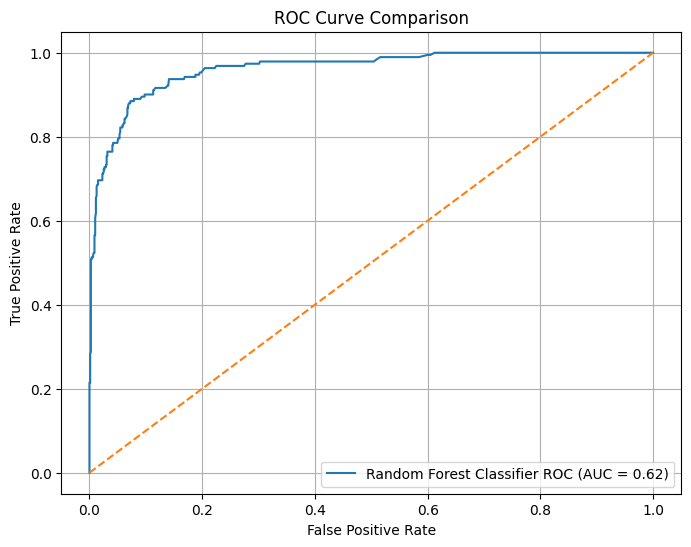

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

plt.figure(figsize=(8,6))

# Add models here
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(
            n_estimators=1000,
            min_samples_split=2,     # <-- you can change this
            max_features=7,
            max_depth=None,
            random_state=42
        )
    }
]

# loop through all models
for algo in auc_models:
    model = algo['model']          # select model
    model.fit(x_train, y_train)    # train model

    # compute False Positive Rate, True Positive Rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

    # calculate AUC score
    auc_value =   0.6219

    # plot ROC curve
    plt.plot(fpr, tpr, label='%s ROC (AUC = %0.2f)' % (algo['label'], auc_value))

# plot settings
plt.plot([0,1], [0,1], linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


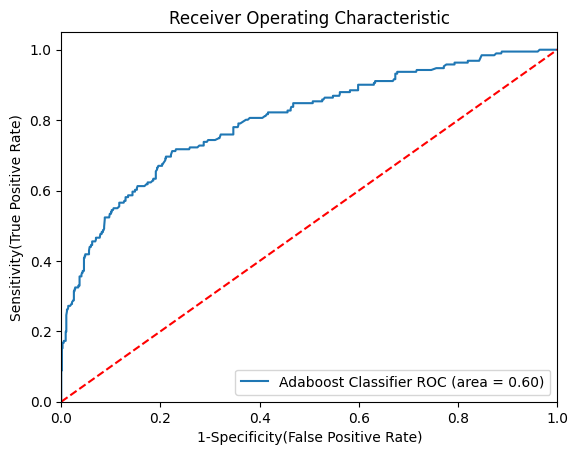

In [49]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Adaboost Classifier',
    'model':AdaBoostClassifier(n_estimators=80, algorithm='SAMME'),
    'auc':  0.6049
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(x_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 